# WEEK PREDICTIONS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from api_info import *
from credentials import *
from api_functions import *
from stat_functions import *

In [4]:
d = retrieve_espn_data(swid,espn_s2,league_id)
data = clean_data(d)

Player has irregular eligible slots: Elias N. Pettersson has slots [10, 4, 6, 7, 8]


In [5]:
data["Team"] = data["TeamID"].map(team_dict)


In [12]:
skater_cats = [
    "goals",
    "assists",
    "plus_minus",
    "penalty_minutes",
    "power play points",
    "FOW",
    "average_time_on_ice",
    "shots_on_goal",
    "hits",
    "blocks",
]

In [8]:
metric = "30"

skater_data = data[(data["Position"] != "GK")]

played_players = skater_data.copy()

played_players["Team"] = played_players["TeamID"].map(team_dict)
played_players = played_players[
    (played_players["InjuryStatus"] != "INJURY_RESERVE")
    & (played_players["InjuryStatus"] != "OUT")
]

for cat in skater_cats:
    played_players[cat] = played_players[cat + metric]
played_players = played_players[["ID", "Name", "Team", "LeagueTeamID"] + skater_cats]

In [18]:
# games = pd.read_csv("this_weeks_games.csv")
games = pd.read_csv("next_weeks_games.csv")
g_id = 7
opp_id = 2
g_team = played_players[played_players["LeagueTeamID"] == g_id]
opp_team = played_players[played_players["LeagueTeamID"] == opp_id]

In [19]:
len(g_team), len(opp_team)

(23, 22)

In [20]:
week = 16
team_scores = retrieve_espn_matchup(swid,espn_s2,league_id,week)
# Unused due to delay

In [25]:
current_opp_scores_list = [0 for _ in skater_cats]
current_g_scores_list = [0 for _ in skater_cats]


current_g_atoi = 0
current_g_players = 1
current_opp_atoi = 0
current_opp_players = 1

current_opp_scores = {
    skater_cats[i]: current_opp_scores_list[i] for i in range(len(skater_cats))
}
current_g_scores = {
    skater_cats[i]: current_g_scores_list[i] for i in range(len(skater_cats))
}


dropped_days_g = {}
dropped_days_opp = {}
swapped_days_g = {}
swapped_days_opp = {}

In [26]:
# current_g_atoi = 20 * 60 + 3
# current_g_players = 69
# current_opp_atoi = 0 * 60 + 58
# current_opp_players = 68

# current_opp_scores_list = [
#     9,
#     18,
#     0,
#     33,
#     9,
#     78,
#     current_opp_atoi * current_opp_players / 60,
#     67,
#     45,
#     32,
# ]
# current_g_scores_list = [
#     10,
#     14,
#     13,
#     19,
#     3,
#     61,
#     current_g_atoi * current_g_players / 60,
#     75,
#     40,
#     36,
# ]


# current_opp_scores = {
#     skater_cats[i]: current_opp_scores_list[i] for i in range(len(skater_cats))
# }
# current_g_scores = {
#     skater_cats[i]: current_g_scores_list[i] for i in range(len(skater_cats))
# }

In [27]:
# swapped_days_g = {}
# swapped_days_g["Monday"]=[('Braden Schneider','Cam Fowler'),('Nikita Zadorov','Ben Chiarot')]

In [28]:
# dropped_days_g['Tuesday']=['Steven Stamkos','Carter Verhaeghe','Alexis Lafreniere','Mika Zibanejad']

In [29]:
# current_day = "Thursday"
current_day = None
predict_tomorrow = False


End: goals G 20.19267676767677 Opp 18.0781746031746 Diff 2.11450216450217 0.10471628842625455

End: assists G 32.62056277056277 Opp 31.597619047619048 Diff 1.0229437229437224 0.031358861897589345

End: plus_minus G 1.1932178932178932 Opp -2.140079365079366 Diff 3.333297258297259 2.7935360986818245

End: penalty_minutes G 25.819841269841273 Opp 24.31031746031746 Diff 1.509523809523813 0.058463713767559225

End: power play points G 11.413636363636364 Opp 14.337698412698414 Diff -2.9240620490620497 -0.2561902233347873

End: FOW G 197.39393939393938 Opp 109.54404761904763 Diff 87.84989177489174 0.4450485766919601

End: average_time_on_ice G 19.653179395743962 Opp 19.67887676366667 Diff -0.025697367922706604 -0.0013075425306640998

End: shots_on_goal G 160.48369408369408 Opp 140.36150793650796 Diff 20.122186147186113 0.12538461469295542

End: hits G 70.46002886002886 Opp 52.213095238095235 Diff 18.24693362193362 0.2589685800183498

End: blocks G 62.01305916305917 Opp 77.92023809523809 Diff

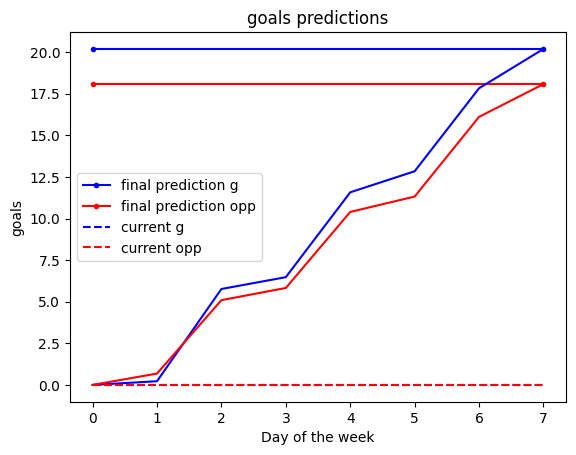

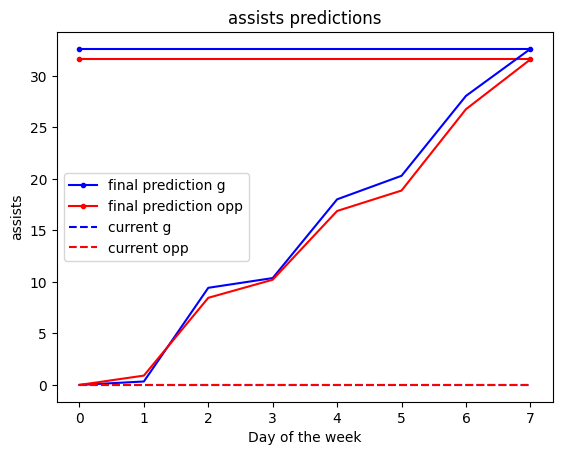

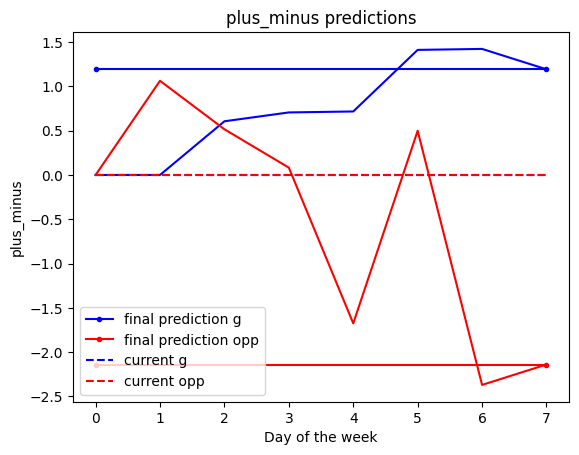

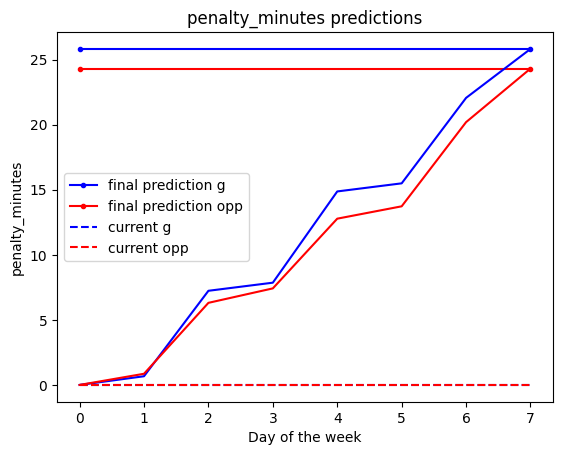

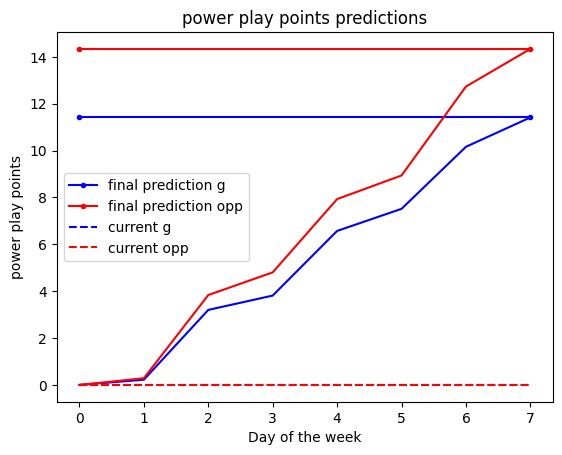

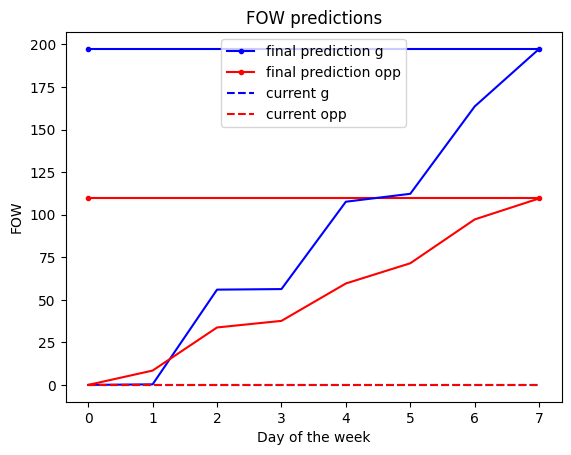

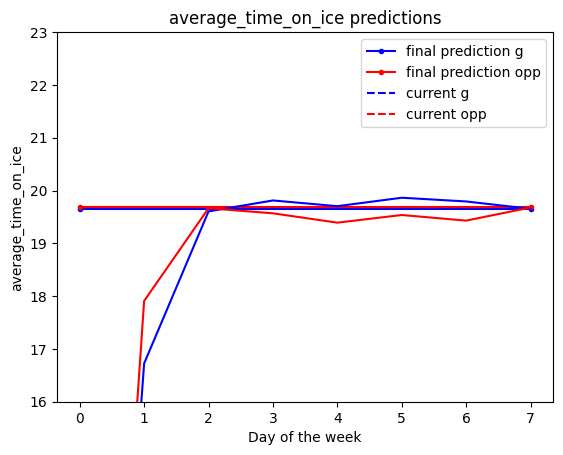

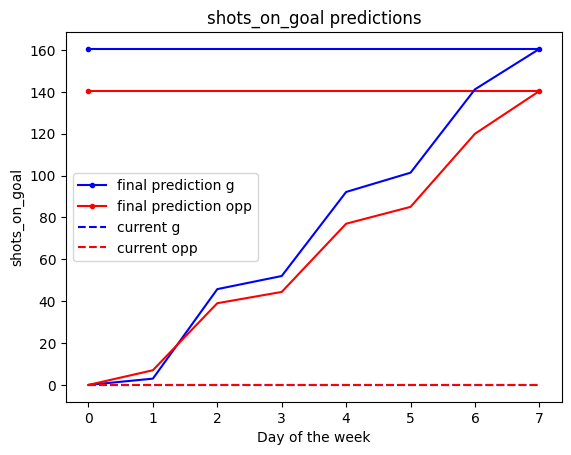

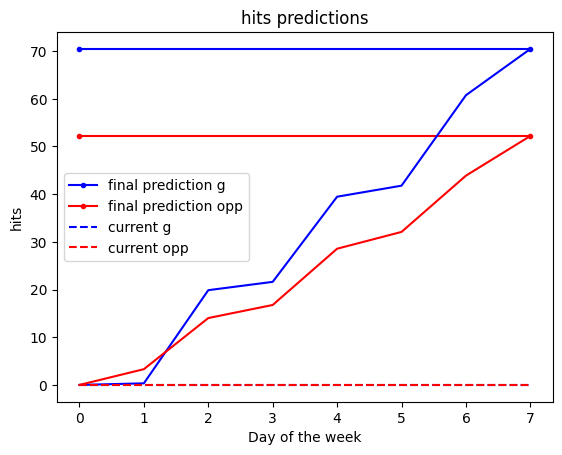

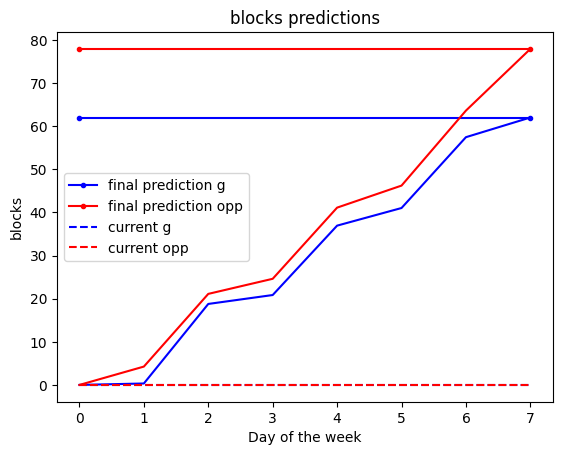

In [37]:
teams = (g_team,opp_team)
scores = (current_g_scores,current_opp_scores)
swapped_days = (swapped_days_g,swapped_days_opp)
dropped_days = (dropped_days_g,dropped_days_opp)
current_players = (current_g_players,current_opp_players)
overall_wins,win_cats,num_players = get_week_predictions(teams, played_players,games,skater_cats,scores,swapped_days,dropped_days,current_players,current_day=current_day,predict_tomorrow=predict_tomorrow)

print(overall_wins)
print("Win cats: ", win_cats)
print(num_players)

In [38]:
# games_analysis = pd.read_csv("this_weeks_games.csv")
games_analysis = pd.read_csv("next_weeks_games.csv")
games_analysis = games_analysis[["Day", "Home Team", "Away Team"]]

In [39]:
def g_team_counts(team):
    return len(g_team[g_team["Team"] == team])


def opp_team_counts(team):
    return len(opp_team[opp_team["Team"] == team])

In [40]:
games_analysis["Home Team g"] = games_analysis["Home Team"].apply(g_team_counts)
games_analysis["Away Team g"] = games_analysis["Away Team"].apply(g_team_counts)
games_analysis["Home Team opp"] = games_analysis["Home Team"].apply(opp_team_counts)
games_analysis["Away Team opp"] = games_analysis["Away Team"].apply(opp_team_counts)

games_analysis["Home Bias"] = (
    games_analysis["Home Team g"]
    - games_analysis["Home Team opp"]
    - games_analysis["Away Team g"]
    + games_analysis["Away Team opp"]
)
games_analysis["Preferred result"] = games_analysis["Away Team"].where(
    games_analysis["Home Bias"] < 0
)
games_analysis["Preferred result"].loc[games_analysis["Home Bias"] > 0] = (
    games_analysis["Home Team"]
)
games_analysis["Result Importance"] = abs(games_analysis["Home Bias"])
games_analysis["Total players"] = (
    games_analysis["Home Team g"]
    + games_analysis["Away Team g"]
    + games_analysis["Home Team opp"]
    + games_analysis["Away Team opp"]
)

C:\Users\georg\AppData\Local\Temp\ipykernel_16056\894675059.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  games_analysis["Preferred result"].loc[games_analysis["Home Bias"] > 0] = (
C:\Users\georg\AppData\Local\Temp\ipykernel_16056\89

In [42]:
games_analysis.sort_values(by="Result Importance", ascending=False)

,Day,Home Team,Away Team,Home Team g,Away Team g,Home Team opp,Away Team opp,Home Bias,Preferred result,Result Importance,Total players
32,Saturday,New York Islanders,Nashville Predators,3,1,0,2,4,New York Islanders,4,6
17,Thursday,Boston Bruins,New York Islanders,0,3,1,0,-4,New York Islanders,4,4
24,Thursday,Carolina Hurricanes,Buffalo Sabres,2,0,0,1,3,Carolina Hurricanes,3,3
29,Friday,New York Rangers,Toronto Maple Leafs,1,1,0,3,3,New York Rangers,3,5
4,Tuesday,Montreal Canadiens,Carolina Hurricanes,1,2,2,0,-3,Carolina Hurricanes,3,5
0,Monday,Winnipeg Jets,San Jose Sharks,0,0,0,2,2,Winnipeg Jets,2,2
42,Saturday,Utah Hockey Club,New Jersey Devils,2,1,0,1,2,Utah Hockey Club,2,4
34,Saturday,Columbus Blue Jackets,Detroit Red Wings,1,0,0,1,2,Columbus Blue Jackets,2,2
19,Thursday,Detroit Red Wings,Columbus Blue Jackets,0,1,1,0,-2,Columbus Blue Jackets,2,2
39,Saturday,Carolina Hurricanes,Edmonton Oilers,2,1,0,1,2,Carolina Hurricanes,2,4
